# LIBRARY IMPORT

Cell 1:
This cell imports necessary libraries:
- `numpy` and `pandas` for data manipulation.
- `gtada.time_series` modules such as `SlidingWindow` and `TakensEmbedding` for time series embedding and analysis.
- `gtada.homology` module for calculating persistent homology using the `VietorisRipsPersistence`.
- `gtada.diagrams` module for computing persistence diagram amplitudes.
- `matplotlib.pyplot` and `seaborn` for plotting and visualization.
- `gtada.plotting` for diagram visualization.


In [1]:
import numpy as np
import pandas as pd
from gtda.time_series import SlidingWindow
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Amplitude
import matplotlib.pyplot as plt
from gtda.time_series import TakensEmbedding
from gtda.plotting import plot_diagram
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

# DATA COLLECTION

In [3]:
df=pd.read_csv("data_BTC-USD_2021-03-22-00-00_2021-04-16-12-00_3600.csv")

In [4]:
df

,time,low,high,open,close,volume
0,2021-03-22 01:00:00,56325.00,56765.29,56600.00,56644.66,837.334698
1,2021-03-22 02:00:00,56450.00,57040.00,56644.66,56978.95,425.951372
2,2021-03-22 03:00:00,56982.48,57627.36,56982.49,57554.94,331.680254
3,2021-03-22 04:00:00,57431.30,57820.61,57561.42,57610.01,303.269188
4,2021-03-22 05:00:00,57300.72,57755.00,57610.01,57578.89,187.739157
...,...,...,...,...,...,...
607,2021-04-16 08:00:00,61205.01,61685.23,61469.21,61264.93,305.320961
608,2021-04-16 09:00:00,60463.00,61323.39,61260.77,60700.01,857.373440
609,2021-04-16 10:00:00,60281.07,61013.46,60700.01,60295.67,609.666449
610,2021-04-16 11:00:00,60048.43,60917.00,60295.64,60900.58,1022.775762


In [5]:
df['time'] = pd.to_datetime(df['time'])

data=df.copy()
print(data)

                   time       low      high      open     close       volume
0   2021-03-22 01:00:00  56325.00  56765.29  56600.00  56644.66   837.334698
1   2021-03-22 02:00:00  56450.00  57040.00  56644.66  56978.95   425.951372
2   2021-03-22 03:00:00  56982.48  57627.36  56982.49  57554.94   331.680254
3   2021-03-22 04:00:00  57431.30  57820.61  57561.42  57610.01   303.269188
4   2021-03-22 05:00:00  57300.72  57755.00  57610.01  57578.89   187.739157
..                  ...       ...       ...       ...       ...          ...
607 2021-04-16 08:00:00  61205.01  61685.23  61469.21  61264.93   305.320961
608 2021-04-16 09:00:00  60463.00  61323.39  61260.77  60700.01   857.373440
609 2021-04-16 10:00:00  60281.07  61013.46  60700.01  60295.67   609.666449
610 2021-04-16 11:00:00  60048.43  60917.00  60295.64  60900.58  1022.775762
611 2021-04-16 12:00:00  60603.09  61085.54  60906.12  60804.14   618.898039

[612 rows x 6 columns]


In [6]:
data=data['close']

# Calculate log returns for each column

In [7]:
log_returns = np.log(data).diff().dropna()

In [8]:
len(log_returns)

611

# CALCULLATE PARAMETERS

## SLIDING WINDOW

In [9]:
import scaleogram as scg
import pywt

In [10]:
# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor3-1.5')

Default wavelet function used to compute the transform: cmor3-1.5 ( Complex Morlet wavelets )


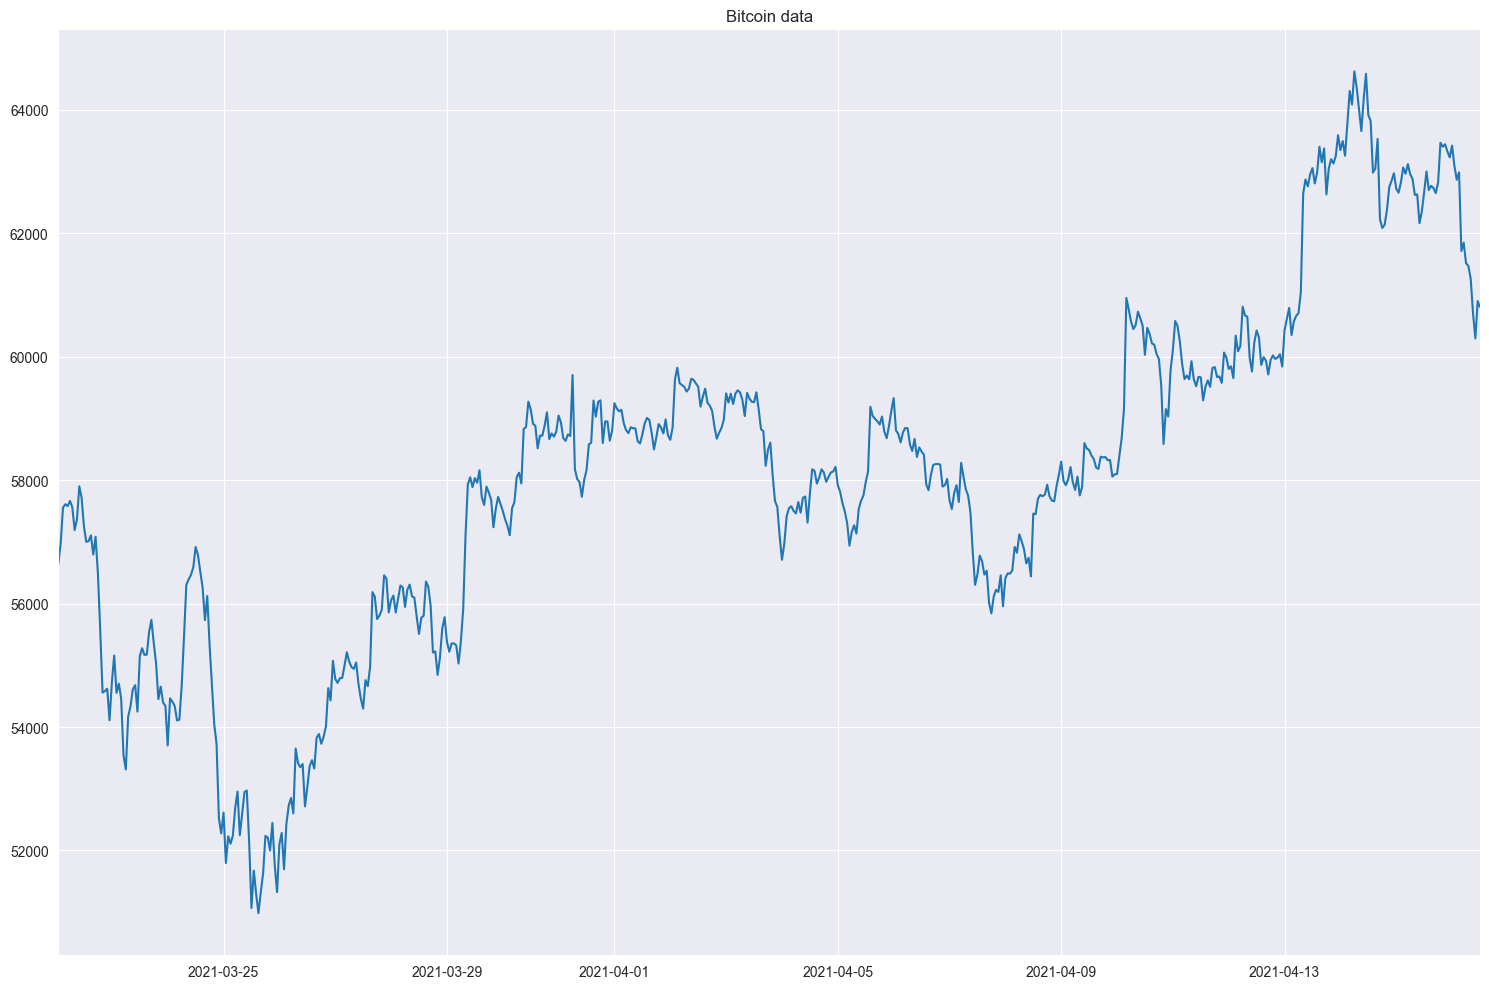

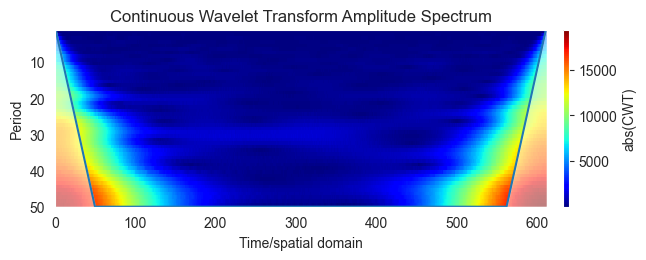

In [11]:
#define range of scales to perform transform
scales=scg.periods2scales(np.arange(1,50))

# Plot the signal
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 10))
ax1.plot(df['time'],data)
ax1.set_xlim(df['time'].min(), df['time'].max())
ax1.set_title("Bitcoin data")
fig1.tight_layout()


#compute and plot scaleogram
fig2, ax2 = plt.subplots(1,1,figsize=(6.9,2.3))
scg.cws(data,scales=scales,ax=ax2,coikw={'alpha': 0.5, 'color': 'white'})

default_wavelet=scg.get_default_wavelet()
print("Default wavelet function used to compute the transform:", default_wavelet, "(",
      pywt.ContinuousWavelet(default_wavelet).family_name, ")")

Default wavelet function used to compute the transform: cmor3-1.5 ( Complex Morlet wavelets )


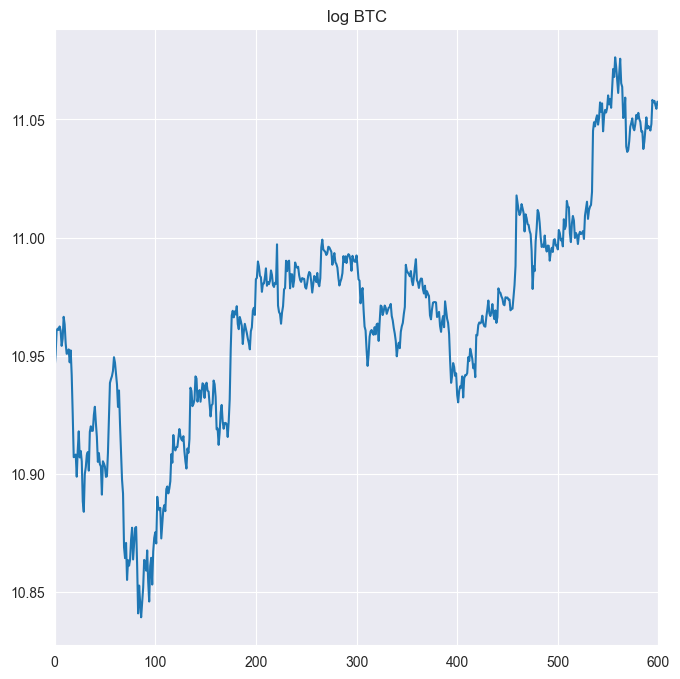

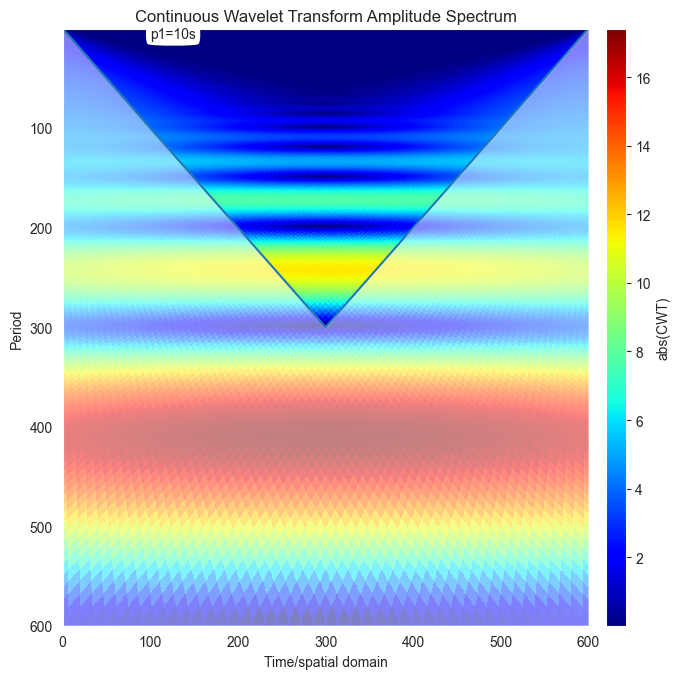

In [12]:
#Wavelet transform applied to log of BTC prices
# Load BTC data
BTC = pd.read_csv('data_BTC-USD_2021-03-22-00-00_2021-04-16-00-00_3600.csv')
logBTC = np.log(BTC['close'])
N = len(logBTC)

# Set the default wavelet
scg.set_default_wavelet('cmor3-1.5')

# Define the scales
scales = scg.periods2scales(np.arange(1, 600))

# Plot the signal
fig1, ax1 = plt.subplots(1, 1, figsize=(6.9, 6.9))
lines = ax1.plot(logBTC)
ax1.set_xlim(0, N)
ax1.set_title("log BTC")
fig1.tight_layout()

# Compute and plot the scaleogram
fig2, ax2 = plt.subplots(1, 1, figsize=(6.9, 6.9))
scg.cws(logBTC, scales=scales, ax=ax2, coikw={'alpha': 0.5, 'color': 'white'})
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

# Print the default wavelet function used to compute the transform
default_wavelet = scg.get_default_wavelet()
print("Default wavelet function used to compute the transform:", default_wavelet, "(",
      pywt.ContinuousWavelet(default_wavelet).family_name, ")")

plt.show()

In [13]:
window_size=20

## DEFINE DELAY and EMBEDDING DIMENSSION

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

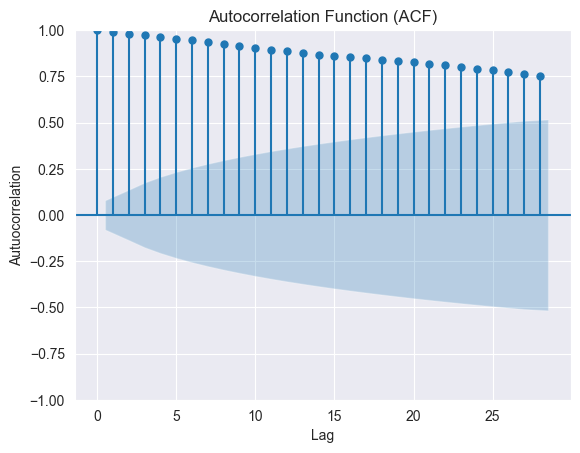

In [15]:
plot_acf(data)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autuocorrelation')
plt.grid(True)

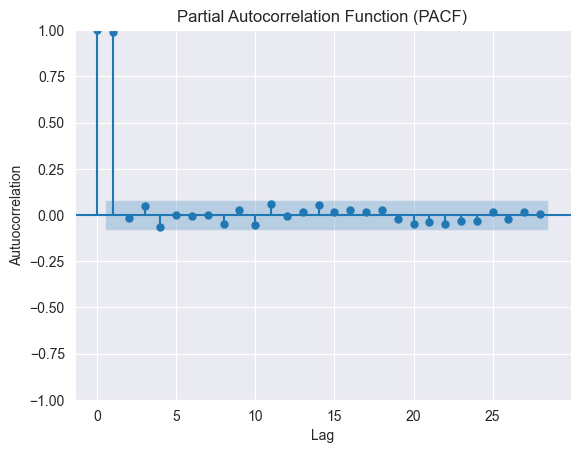

In [16]:
plot_pacf(data)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autuocorrelation')
plt.grid(True)

In [17]:
delay=2

In [18]:
embedding_dimension=4


#  Sliding Window

In [19]:
from gtda.time_series import SlidingWindow



sw = SlidingWindow(size=window_size, stride=1)
point_clouds = sw.fit_transform(log_returns)


In [20]:
takens=TakensEmbedding(time_delay=delay,dimension=embedding_dimension)

In [21]:
embedded_data=takens.fit_transform(point_clouds)

# Compute Persistence Diagrams

In [22]:
from gtda.homology import VietorisRipsPersistence

vr = VietorisRipsPersistence(homology_dimensions=[1])  # Focus on 1-dimensional features (loops)
diagrams = vr.fit_transform(embedded_data)


# Persistence Landscapes & Lp Norms

In [23]:
from gtda.diagrams import Amplitude

# Computing L1 norms of persistence landscapes
amplitude_L1 = Amplitude(metric='landscape', metric_params={'p': 1, 'n_bins': 50, 'n_layers': 1}, order=1)
lp_norms_L1 = amplitude_L1.fit_transform(diagrams)

# Computing L2 norms of persistence landscapes
amplitude_L2 = Amplitude(metric='landscape', metric_params={'p': 2, 'n_bins': 50, 'n_layers': 1}, order=2)
lp_norms_L2 = amplitude_L2.fit_transform(diagrams)


In [24]:
def normalize_data(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data



Normalize L norms

In [25]:
lp_norms_L1=normalize_data(lp_norms_L1)
lp_norms_L2=normalize_data(lp_norms_L2)

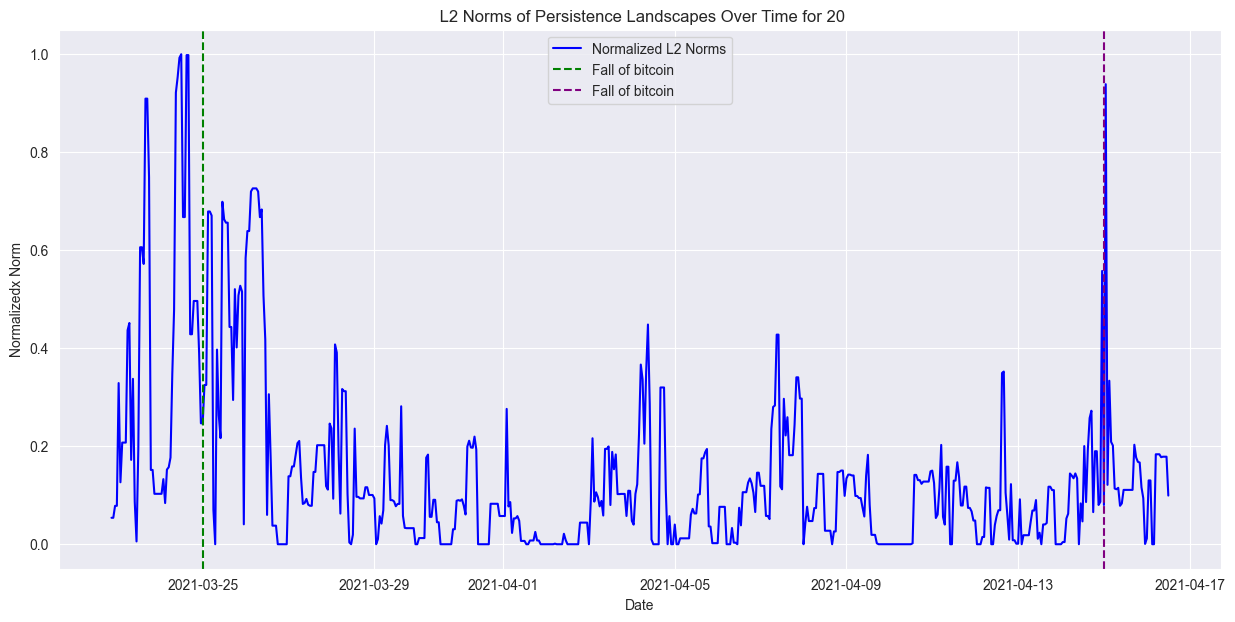

In [26]:
adjusted_dates = df['time'][window_size:]

plt.figure(figsize=(15, 7))
plt.plot(adjusted_dates, lp_norms_L2.flatten(), label='Normalized L2 Norms', color='blue')   # Ensure lp_norms2 is flattened
plt.axvline(pd.Timestamp('2021-03-25'), color='green',linestyle='--', label='Fall of bitcoin')
plt.axvline(pd.Timestamp('2021-04-15'), color='purple',linestyle='--', label='Fall of bitcoin')

plt.title(' L2 Norms of Persistence Landscapes Over Time for 20')
plt.xlabel('Date')
plt.ylabel('Normalizedx Norm')
plt.legend()
plt.show()

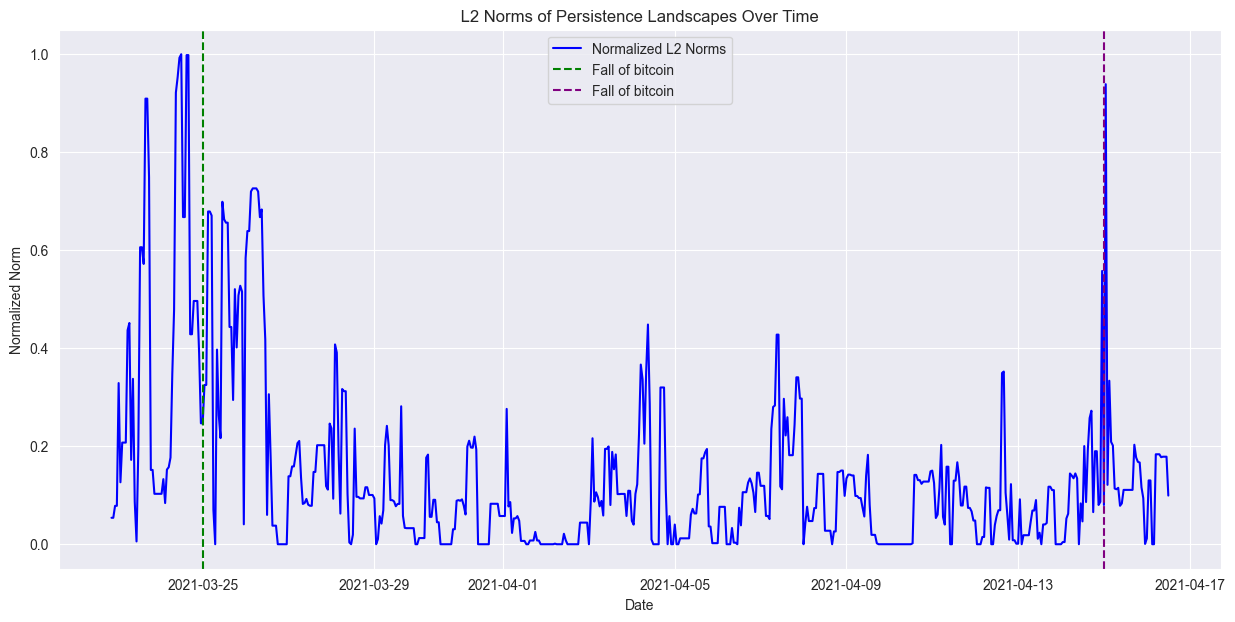

In [27]:
adjusted_dates = df['time'][window_size:]

plt.figure(figsize=(15, 7))
plt.plot(adjusted_dates, lp_norms_L2.flatten(), label='Normalized L2 Norms', color='blue')   # Ensure lp_norms2 is flattened
plt.axvline(pd.Timestamp('2021-03-25'), color='green',linestyle='--', label='Fall of bitcoin')
plt.axvline(pd.Timestamp('2021-04-15'), color='purple',linestyle='--', label='Fall of bitcoin')

plt.title(' L2 Norms of Persistence Landscapes Over Time ')
plt.xlabel('Date')
plt.ylabel('Normalized Norm')
plt.legend()
plt.show()

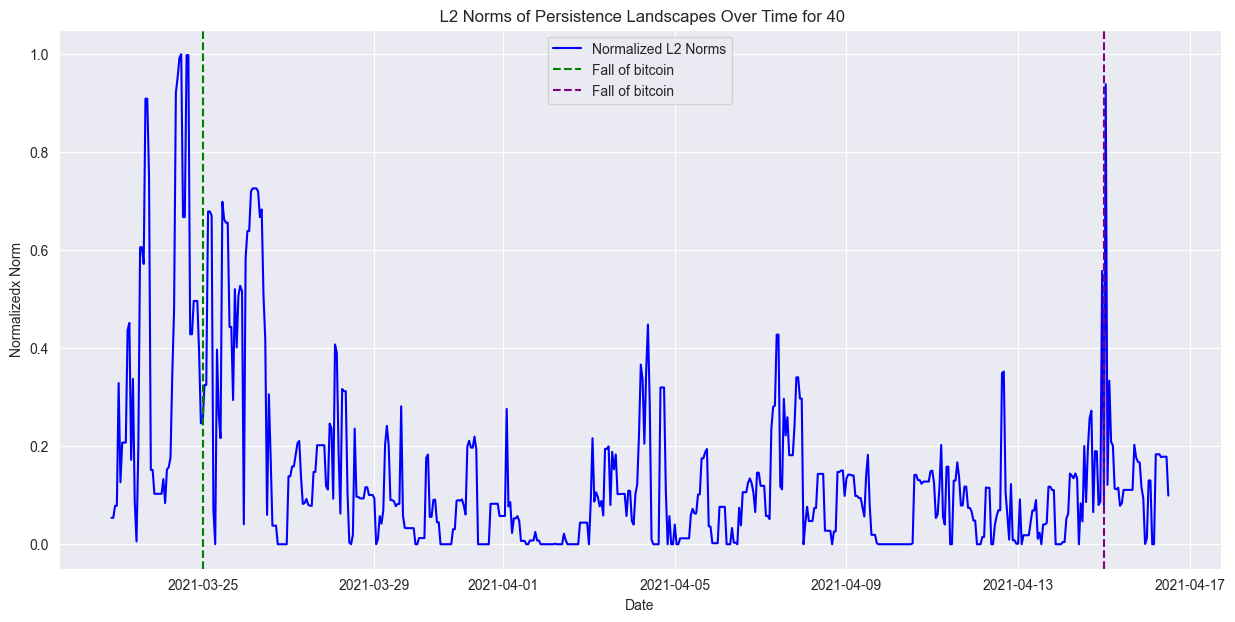

In [28]:
adjusted_dates = df['time'][window_size:]

plt.figure(figsize=(15, 7))
plt.plot(adjusted_dates, lp_norms_L2.flatten(), label='Normalized L2 Norms', color='blue')   # Ensure lp_norms2 is flattened
plt.axvline(pd.Timestamp('2021-03-25'), color='green',linestyle='--', label='Fall of bitcoin')
plt.axvline(pd.Timestamp('2021-04-15'), color='purple',linestyle='--', label='Fall of bitcoin')

plt.title(' L2 Norms of Persistence Landscapes Over Time for 40')
plt.xlabel('Date')
plt.ylabel('Normalizedx Norm')
plt.legend()
plt.show()

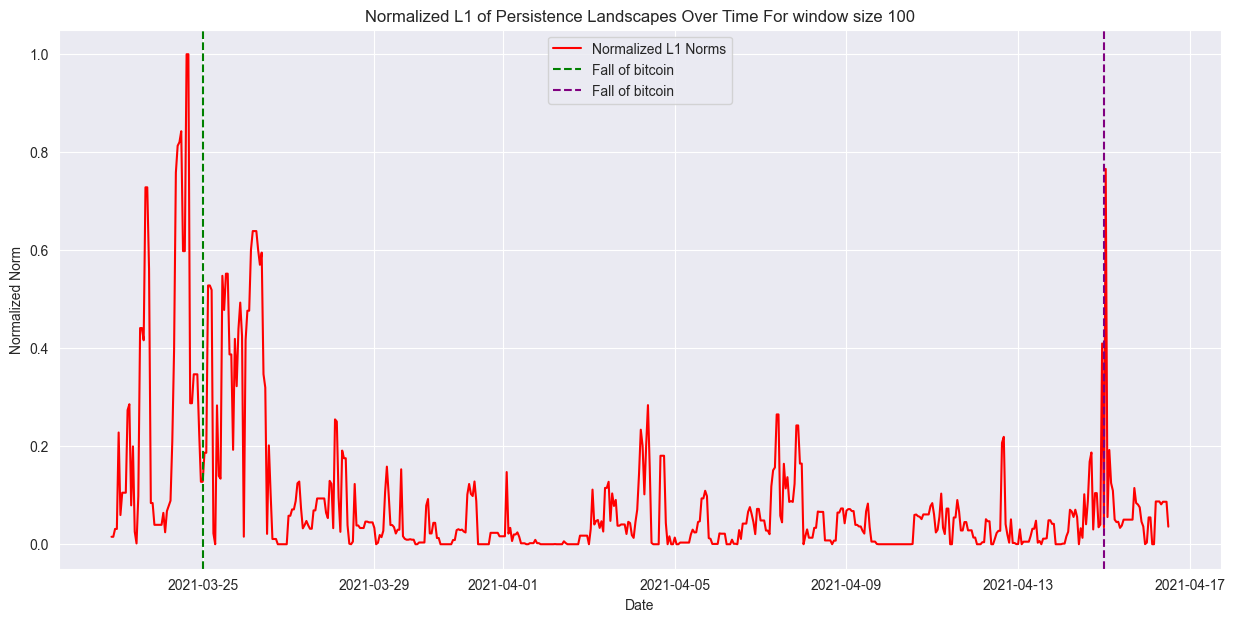

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(adjusted_dates, lp_norms_L1.flatten(), label='Normalized L1 Norms', color='RED')   # Ensure lp_norms2 is flattened

# Highlighting the financial crises of 2000 and 2008
plt.axvline(pd.Timestamp('2021-03-25'), color='green',linestyle='--', label='Fall of bitcoin')
plt.axvline(pd.Timestamp('2021-04-15'), color='purple',linestyle='--', label='Fall of bitcoin')

plt.title('Normalized L1 of Persistence Landscapes Over Time For window size 100')
plt.xlabel('Date')
plt.ylabel('Normalized Norm')
plt.legend()
plt.show()

The experiment found that the L1 and L2 norms of the persistence landscapes exhibited notable peaks around specific dates, such as March 25, 2021 and April 15, 2021, which corresponded to a significant event in the Bitcoin market.

These peaks suggest that the topological complexity of the market increased during times of instability, indicating that these norms could serve as indicators of underlying market stress or transitions

